# Analyzing the outputs

### 10/07/2022

In [1]:
# Import the needed packages

import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
import seaborn as sns
import networkx as nx

In [2]:
# read in the needed data

#agent_log_df = pd.read_csv('/users/yzhan636/data/akhann16/cadre_simulated_data/2022-09-30/agent_log.csv')
#counts_log_df = pd.read_csv('/users/yzhan636/data/akhann16/cadre_simulated_data/2022-09-30/counts_log.csv')
#network_log_df = pd.read_csv('/users/yzhan636/data/akhann16/cadre_simulated_data/2022-09-30/network_log.csv')

agent_log_1_df = pd.read_csv('/users/yzhan636/data/akhann16/cadre_simulated_data/2022-09-30/agent_log_1.csv')
counts_log_1_df = pd.read_csv('/users/yzhan636/data/akhann16/cadre_simulated_data/2022-09-30/counts_log_1.csv')
network_log_1_df = pd.read_csv('/users/yzhan636/data/akhann16/cadre_simulated_data/2022-09-30/network_log_1.csv')

In [3]:
network_log_1_df_time_0 = network_log_1_df.loc[network_log_1_df['tick'] == 0]
network_log_1_df_time_1 = network_log_1_df.loc[network_log_1_df['tick'] == 1]
network_log_1_df_time_91 = network_log_1_df.loc[network_log_1_df['tick'] == 91]
network_log_1_df_time_491 = network_log_1_df.loc[network_log_1_df['tick'] == 491]
network_log_1_df_time_991 = network_log_1_df.loc[network_log_1_df['tick'] == 991]

agent_log_1_df_time_0 = agent_log_1_df.loc[agent_log_1_df['tick'] == 0]
agent_log_1_df_time_1 = agent_log_1_df.loc[agent_log_1_df['tick'] == 1]
agent_log_1_df_time_91 = agent_log_1_df.loc[agent_log_1_df['tick'] == 91]
agent_log_1_df_time_491 = agent_log_1_df.loc[agent_log_1_df['tick'] == 491]
agent_log_1_df_time_991 = agent_log_1_df.loc[agent_log_1_df['tick'] == 991]

In [9]:
print(network_log_1_df_time_0)

Empty DataFrame
Columns: [tick, p1, p2]
Index: []


In [4]:
agent_log_1_df_time_91_list = agent_log_1_df_time_91['agent_id'].tolist()

full_1000_list = []

for i in range(1000):
    full_1000_list.append(i)
    

not_in = []

for item in full_1000_list: 
    if item not in agent_log_1_df_time_91_list: 
        not_in.append(item)

print(not_in)

[72, 101, 104, 139, 208, 277, 301, 472, 500, 572, 605, 619, 672, 711, 798, 960, 983]


In [5]:
agent_log_1_df_time_1_list = agent_log_1_df_time_1['agent_id'].tolist()
agent_log_1_df_time_91_list = agent_log_1_df_time_91['agent_id'].tolist()


not_in = []

for item in agent_log_1_df_time_1_list: 
    if item not in agent_log_1_df_time_91_list: 
        not_in.append(item)

print(not_in)

[10020, 10042, 10089, 10181, 10197]


In [6]:
not_in_2 = []

for item in agent_log_1_df_time_91_list: 
    if item not in agent_log_1_df_time_1_list: 
        not_in_2.append(item)

print(not_in_2)

[10211, 10212, 10213, 10214, 10215]


In [5]:
# Print out the number of connections in each time step
network_1_count_summary = network_log_1_df.groupby(['tick'])['tick'].count()
network_1_count_summary = pd.DataFrame(data=network_1_count_summary)
print(network_1_count_summary)

       tick
tick       
1     50231
11    50245
21    50245
31    50245
41    50245
...     ...
951   50040
961   50040
971   50040
981   50040
991   50040

[100 rows x 1 columns]


### Q1: How many people are connected in the beginning (time step 1)?

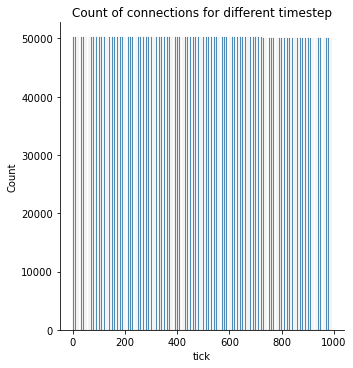

In [6]:
sns.displot(network_log_1_df, x="tick", binwidth=3).set(title='Count of connections for different timestep')

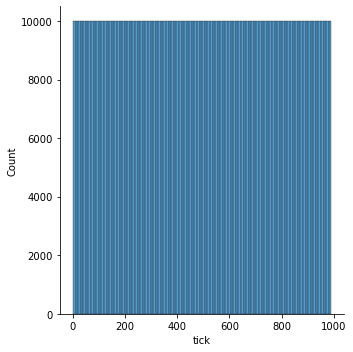

In [7]:
sns.displot(agent_log_1_df, x="tick")

In [8]:
print(network_log_1_df_time_1)

       tick    p1     p2
0         1     0    693
1         1     0   2493
2         1     0   4789
3         1     0   6258
4         1     0   9623
...     ...   ...    ...
50226     1  9981  10004
50227     1  9981  10151
50228     1  9983  10109
50229     1  9988  10045
50230     1  9997  10070

[50231 rows x 3 columns]


In [9]:
network_log_1_df_time_1_p1 = network_log_1_df_time_1['p1'].tolist()
network_log_1_df_time_1_p2 = network_log_1_df_time_1['p2'].tolist()

print("The number of people that has connections at time step 1 is",len(np.unique(network_log_1_df_time_1_p1 + network_log_1_df_time_1_p2)))

The number of people that has connections at time step 1 is 10000


In [10]:
network_log_1_df_time_1_connections_list = []
for i in range(network_log_1_df_time_1.shape[0]):
    network_log_1_df_time_1_connections_list.append({network_log_1_df_time_1.iloc[i]["p1"], network_log_1_df_time_1.iloc[i]["p2"]})

network_log_1_df_time_1_connections_list_res = []
for item in network_log_1_df_time_1_connections_list: 
    if item not in network_log_1_df_time_1_connections_list_res: 
        network_log_1_df_time_1_connections_list_res.append(item) 

print("unique number of cennections at time 1 is", len(network_log_1_df_time_1_connections_list_res))

unique number of cennections at time 1 is 50231


### Q2: How many at the end (time step 1000)?

In [11]:
print(network_log_1_df_time_991)

         tick     p1     p2
4966535   991      0    693
4966536   991      0   2493
4966537   991      0   4789
4966538   991      0   6258
4966539   991      0   9623
...       ...    ...    ...
5016570   991  10403  10548
5016571   991  10420  10510
5016572   991  10421  10574
5016573   991  10581  10642
5016574   991  10601  10642

[50040 rows x 3 columns]


In [12]:
network_log_1_df_time_991_p1 = network_log_1_df_time_991['p1'].tolist()
network_log_1_df_time_991_p2 = network_log_1_df_time_991['p2'].tolist()

print("The number of people that has connections at time step 991 is",len(np.unique(network_log_1_df_time_991_p1 + network_log_1_df_time_991_p2)))

The number of people that has connections at time step 991 is 10000


In [13]:
network_log_1_df_time_991_connections_list = []
for i in range(network_log_1_df_time_991.shape[0]):
    network_log_1_df_time_991_connections_list.append({network_log_1_df_time_991.iloc[i]["p1"], network_log_1_df_time_991.iloc[i]["p2"]})

network_log_1_df_time_991_connections_list_res = []
for item in network_log_1_df_time_991_connections_list: 
    if item not in network_log_1_df_time_991_connections_list_res: 
        network_log_1_df_time_991_connections_list_res.append(item) 

print("unique number of cennections at time 991 is", len(network_log_1_df_time_991_connections_list_res))

unique number of cennections at time 991 is 50040


### Q3: How many at some point in the middle (around 500)?

In [14]:
print(network_log_1_df_time_491)

         tick     p1     p2
2461199   491      0    693
2461200   491      0   2493
2461201   491      0   4789
2461202   491      0   6258
2461203   491      0   9623
...       ...    ...    ...
2511373   491  10194  10388
2511374   491  10198  10276
2511375   491  10199  10414
2511376   491  10206  10330
2511377   491  10215  10353

[50179 rows x 3 columns]


In [15]:
network_log_1_df_time_491_p1 = network_log_1_df_time_491['p1'].tolist()
network_log_1_df_time_491_p2 = network_log_1_df_time_491['p2'].tolist()

print("The number of people that has connections at time step 491 is",len(np.unique(network_log_1_df_time_491_p1 + network_log_1_df_time_491_p2)))

The number of people that has connections at time step 491 is 10000


In [16]:
network_log_1_df_time_491_connections_list = []
for i in range(network_log_1_df_time_491.shape[0]):
    network_log_1_df_time_491_connections_list.append({network_log_1_df_time_491.iloc[i]["p1"], network_log_1_df_time_491.iloc[i]["p2"]})

network_log_1_df_time_491_connections_list_res = []
for item in network_log_1_df_time_491_connections_list: 
    if item not in network_log_1_df_time_491_connections_list_res: 
        network_log_1_df_time_491_connections_list_res.append(item) 

print("unique number of cennections at time 491 is", len(network_log_1_df_time_491_connections_list_res))

unique number of cennections at time 491 is 50179


### Q4: Of the relationships that exist in the beginning, how many exist at time step 100? How many exist at 500? At the end?

In [17]:
print("unique number of cennections at time 1 is", len(network_log_1_df_time_1_connections_list_res))

unique number of cennections at time 1 is 50231


In [18]:
network_log_1_df_time_91_p1 = network_log_1_df_time_91['p1'].tolist()
network_log_1_df_time_91_p2 = network_log_1_df_time_91['p2'].tolist()


network_log_1_df_time_91_connections_list = []

for i in range(network_log_1_df_time_91.shape[0]):
    network_log_1_df_time_91_connections_list.append({network_log_1_df_time_91.iloc[i]["p1"], network_log_1_df_time_91.iloc[i]["p2"]})


network_time_still_exist_at_91 = []

for item in network_log_1_df_time_1_connections_list: 
    if item in network_log_1_df_time_91_connections_list: 
        network_time_still_exist_at_91.append(item) 

print("still exist at step 91:", len(network_time_still_exist_at_91))

still exist at step 91: 50186


In [19]:
network_time_still_exist_at_491 = []

for item in network_log_1_df_time_1_connections_list: 
    if item in network_log_1_df_time_491_connections_list: 
        network_time_still_exist_at_491.append(item) 

print("still exist at step 491:", len(network_time_still_exist_at_491))

still exist at step 491: 48079


In [20]:
network_time_still_exist_at_991 = []

for item in network_log_1_df_time_1_connections_list: 
    if item in network_log_1_df_time_991_connections_list: 
        network_time_still_exist_at_991.append(item) 

print("still exist at step 991:", len(network_time_still_exist_at_991))

still exist at step 991: 45928


### Q5: Visualize the networks: beginning, middle, end. Create different versions of this network structure, where nodes are highlighted by age, race, sex, incarceration status, etc etc. 


In [21]:
print(agent_log_1_df_time_1)

      tick  agent_id  agent_age agent_race  agent_female  \
0        1         0         58      White             0   
1        1         1         43      White             1   
2        1         2         45      White             0   
3        1         3         24      Asian             0   
4        1         4         35      White             0   
...    ...       ...        ...        ...           ...   
9995     1     10206         20      White             0   
9996     1     10207         52      White             0   
9997     1     10208         46   Hispanic             1   
9998     1     10209         21      White             1   
9999     1     10210         28      White             1   

      agent_alc_use_status agent_smoking_status  \
0                        1               Former   
1                        1                Never   
2                        2                Never   
3                        1               Former   
4                       

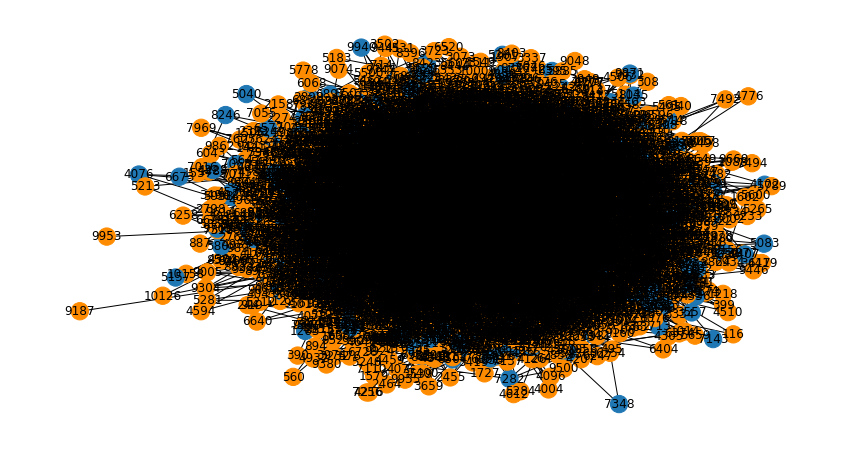

In [22]:
# Create graph object
fig, ax = plt.subplots(figsize=(15, 8))

G = nx.from_pandas_edgelist(network_log_1_df_time_1, 'p1', 'p2', create_using=nx.Graph())

# Make types into categories
agent_log_1_df_time_1 = agent_log_1_df_time_1.set_index('agent_id')
agent_log_1_df_time_1 = agent_log_1_df_time_1.reindex(G.nodes())

agent_log_1_df_time_1['agent_race'] = pd.Categorical(agent_log_1_df_time_1['agent_race'])
agent_log_1_df_time_1['agent_race'].cat.codes

# Specify colors
cmap = matplotlib.colors.ListedColormap(['C0', 'darkorange'])

# Draw graph
nx.draw(G, with_labels=True, node_color=agent_log_1_df_time_1['agent_race'].cat.codes, cmap=cmap)